In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/kishorekumar14/Fake_Currency_Detection/main/bank_notes.csv")
df.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.shape

(1372, 5)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.describe()

,variance,skewness,curtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


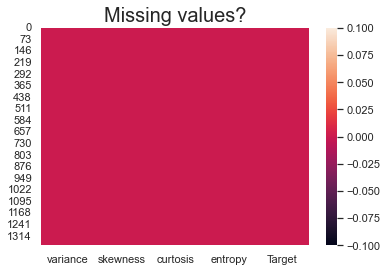

In [6]:
sns.heatmap(df.isnull())
plt.title("Missing values?", fontsize = 20)
plt.show()

C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='variance', ylabel='Density'>

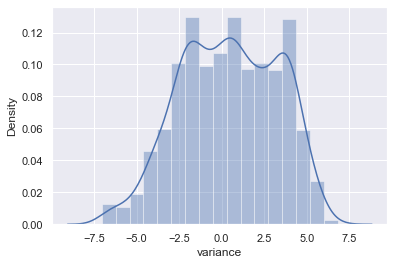

In [34]:
sns.distplot(df.variance)

C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='curtosis', ylabel='Density'>

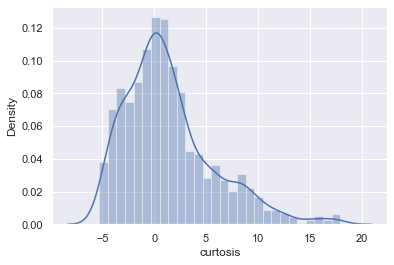

In [35]:
sns.distplot(df.curtosis)

C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='entropy', ylabel='Density'>

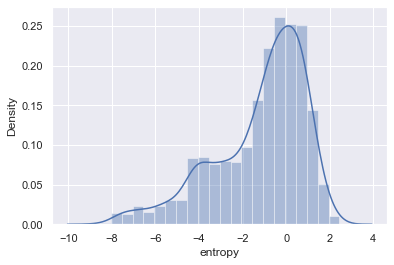

In [36]:
sns.distplot(df.entropy)

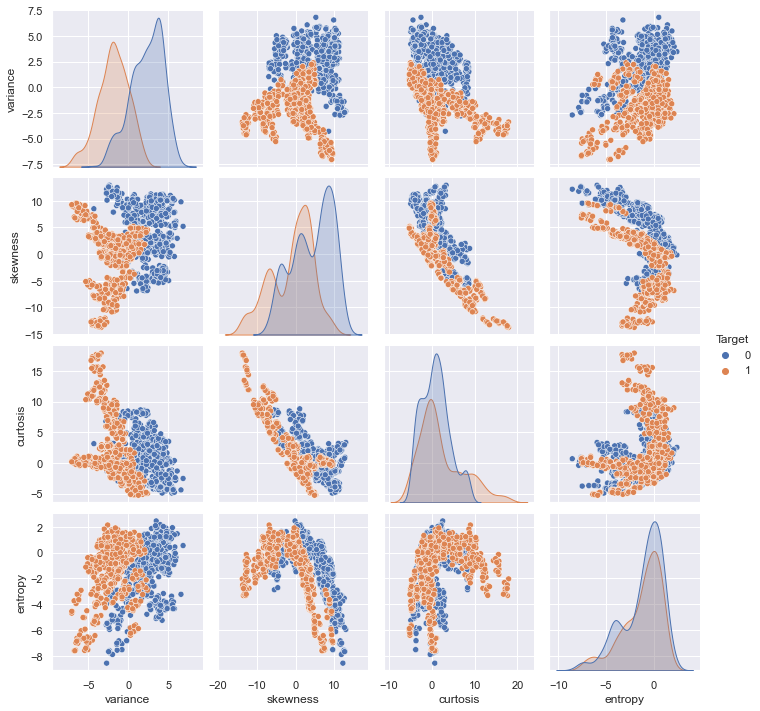

In [7]:
# Pairwise relationships depending on target
sns.pairplot(df, hue = "Target")
plt.show()

<AxesSubplot:ylabel='Target'>

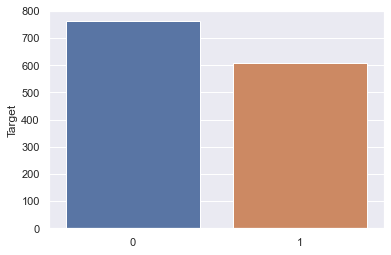

In [8]:
sns.barplot(x=df['Target'].value_counts().index,y=df['Target'].value_counts())

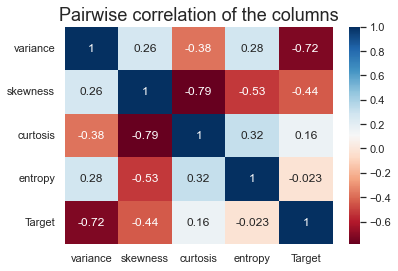

In [9]:
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.title("Pairwise correlation of the columns", fontsize = 18)
plt.show()

In [10]:
independent = df.iloc[0:,0:4].values
independent

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [11]:
dependent = df.iloc[0:,4:].values
dependent

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.2, random_state = 9)

In [14]:
print("Size of training data :",x_train.shape)
print("Size of testing data :", x_test.shape)

Size of training data : (1097, 4)
Size of testing data : (275, 4)


## Support Vector Machine 

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.95      0.98       147
           1       0.95      1.00      0.97       128

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275

Confusion Matrix
 [[140   7]
 [  0 128]]

Accuracy
 97.45 %


C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


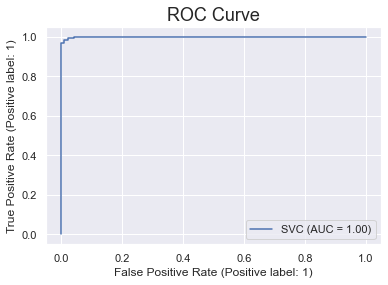

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel = 'poly', random_state = 8)
svm.fit(x_train, y_train)

# Predicting the test set results
test_pred = svm.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
class_report = classification_report(y_test, test_pred)
conf_matrix = confusion_matrix(y_test, test_pred)
acc = accuracy_score(y_test,test_pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n","{0:.2f}".format(acc*100),"%")
results = []
results.append(("SupportVectorMachine",class_report, conf_matrix, acc))
from sklearn import metrics
metrics.plot_roc_curve(svm, x_test, y_test)
plt.title("ROC Curve", fontsize = 18)
plt.show()

In [16]:
print(x_test[225])
print(y_test[225])


[-0.3481  -0.38696 -0.47841  0.62627]
[1]


In [17]:
print(svm.predict([[-1.4106,  -7.108,    5.6454,   0.31335]]))

[1]


In [18]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(x_train)
X_Test = sc_X.transform(x_test)

In [19]:
from sklearn.svm import SVC
classifier_std = SVC(kernel = 'linear', random_state = 8)
classifier_std.fit(X_Train, y_train)

# Predicting the test set results
train_pred_std = classifier_std.predict(X_Train)
test_pred_std = classifier_std.predict(X_Test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

print("std Training data Accuracy score with linear kernel :", "{0:.2f}".format(accuracy_score(y_train, train_pred_std)*100),"%")
print("std Testing data Accuracy score with linear kernel :", "{0:.2f}".format(accuracy_score(y_test, test_pred_std)*100),"%")

std Training data Accuracy score with linear kernel : 98.54 %
std Testing data Accuracy score with linear kernel : 98.18 %


C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic regression 

Classification report:

               precision    recall  f1-score   support

           0       0.99      0.97      0.98       147
           1       0.97      0.99      0.98       128

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

Confusion Matrix
 [[143   4]
 [  1 127]]

Accuracy
 98.18 %


C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


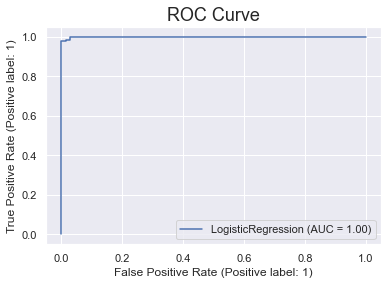

In [20]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train,y_train)

pred = log.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n","{0:.2f}".format(acc*100),"%")
from sklearn import metrics
metrics.plot_roc_curve(log, x_test, y_test)
plt.title("ROC Curve", fontsize = 18)
plt.show()


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(x_train)
X_Test = sc_X.transform(x_test)

model = LogisticRegression()
model.fit(X_Train,y_train)

pred = model.predict(X_Test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n","{0:.2f}".format(acc*100),"%")
results.append(("LogisticRegression",class_report, conf_matrix, acc))


Classification report:

               precision    recall  f1-score   support

           0       0.99      0.96      0.98       147
           1       0.95      0.99      0.97       128

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275

Confusion Matrix
 [[141   6]
 [  1 127]]

Accuracy
 97.45 %


C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Random Forest

C:\Users\KISHORE KUMAR A V\AppData\Local\Temp\ipykernel_16336\4081757492.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)
C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Classification report:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       147
           1       0.99      0.97      0.98       128

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

Confusion Matrix
 [[146   1]
 [  4 124]]

Accuracy
 98.18 %


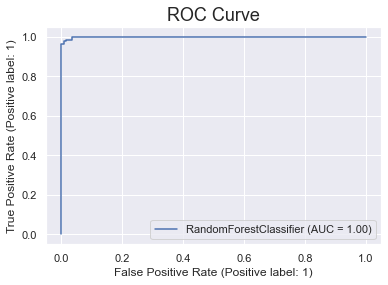

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

pred = rfc.predict(x_test)

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n","{0:.2f}".format(acc*100),"%")
results.append(("RandomForestClassifier",class_report, conf_matrix, acc))
from sklearn import metrics
metrics.plot_roc_curve(rfc, x_test, y_test)
plt.title("ROC Curve", fontsize = 18)
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, random_state = 40)

rfc.fit(X_Train, y_train)

pred = rfc.predict(X_Test)

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n","{0:.2f}".format(acc*100),"%")

C:\Users\KISHORE KUMAR A V\AppData\Local\Temp\ipykernel_16336\1858532376.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_Train, y_train)


Classification report:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       147
           1       0.99      0.97      0.98       128

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

Confusion Matrix
 [[146   1]
 [  4 124]]

Accuracy
 98.18 %


## Naive Bayes 

Classification report:

               precision    recall  f1-score   support

           0       0.84      0.88      0.86       147
           1       0.86      0.80      0.83       128

    accuracy                           0.85       275
   macro avg       0.85      0.84      0.85       275
weighted avg       0.85      0.85      0.85       275

Confusion Matrix
 [[130  17]
 [ 25 103]]

Accuracy
 84.73 %


C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


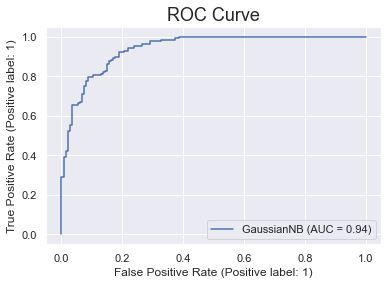

In [24]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()

gb.fit(x_train, y_train)

pred = gb.predict(x_test)

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n","{0:.2f}".format(acc*100),"%")
results.append(("Naive Bayes       ",class_report, conf_matrix, acc))
from sklearn import metrics
metrics.plot_roc_curve(gb, x_test, y_test)
plt.title("ROC Curve", fontsize = 18)
plt.show()

##  KNN

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       147
           1       0.99      1.00      1.00       128

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Confusion Matrix
 [[146   1]
 [  0 128]]

Accuracy
 99.64 %


C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


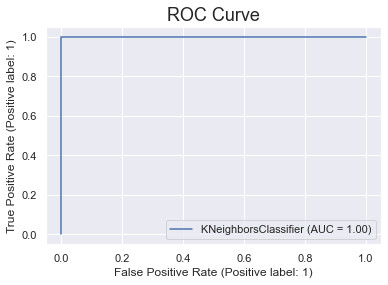

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(x_train, y_train)

pred = knn.predict(x_test)

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n","{0:.2f}".format(acc*100),"%")
results.append(("KNearestNeighbors",class_report, conf_matrix, acc))
from sklearn import metrics
metrics.plot_roc_curve(knn, x_test, y_test)
plt.title("ROC Curve", fontsize = 18)
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=29)

model.fit(X_Train, y_train)

pred = model.predict(X_Test)

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n","{0:.2f}".format(acc*100),"%")


Classification report:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99       147
           1       0.98      1.00      0.99       128

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Confusion Matrix
 [[145   2]
 [  0 128]]

Accuracy
 99.27 %


C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Decision Tree (Gini algorithm) 

Classification report:

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       147
           1       0.98      0.94      0.96       128

    accuracy                           0.96       275
   macro avg       0.97      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275

Confusion Matrix
 [[145   2]
 [  8 120]]

Accuracy
 96.36 %


C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


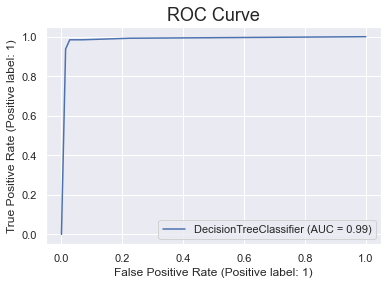

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "gini", random_state = 0, max_depth = 5)

dtc.fit(x_train, y_train)

pred = dtc.predict(x_test)

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n","{0:.2f}".format(acc*100),"%")
results.append(("DecisionTrees       ",class_report, conf_matrix, acc))
from sklearn import metrics
metrics.plot_roc_curve(dtc, x_test, y_test)
plt.title("ROC Curve", fontsize = 18)
plt.show()

## K-Means Clustering 

Now we'll use the unsupervised learning algorithm KMeans to find clusters in the dataset without using the counterfeit column to see if it will be capable to separate well the dataset in two clusters.

#### K-means with SVD 

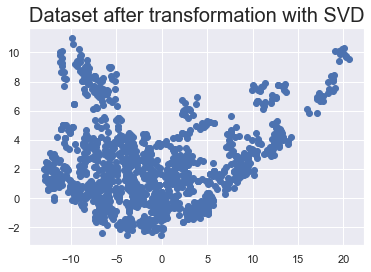

In [28]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2, random_state = 0)

transf = svd.fit_transform(independent)

plt.scatter(x = transf[:,0], y = transf[:,1])
plt.title("Dataset after transformation with SVD", fontsize = 20)
plt.show()

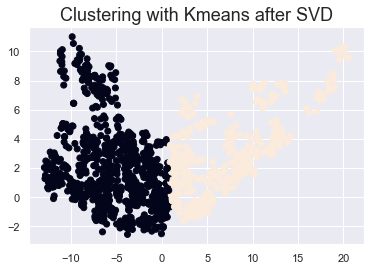

In [29]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)
c = km.fit_predict(transf)

plt.scatter(x = transf[:,0], y = transf[:,1], c = c)
plt.title("Clustering with Kmeans after SVD", fontsize = 18)
plt.show()

#### K-means with PCA

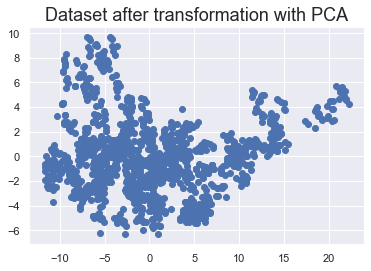

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)

transf = pca.fit_transform(independent)

plt.scatter(x = transf[:,0], y = transf[:,1])
plt.title("Dataset after transformation with PCA", fontsize = 18)
plt.show()

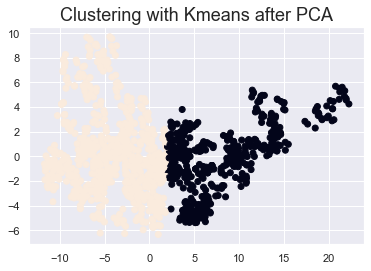

In [31]:
km = KMeans(n_clusters = 2)
c = km.fit_predict(transf)

plt.scatter(x = transf[:,0], y = transf[:,1], c = c)
plt.title("Clustering with Kmeans after PCA", fontsize = 18)
plt.show()

## Comparison of the models¶
 

C:\Users\KISHORE KUMAR A V\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


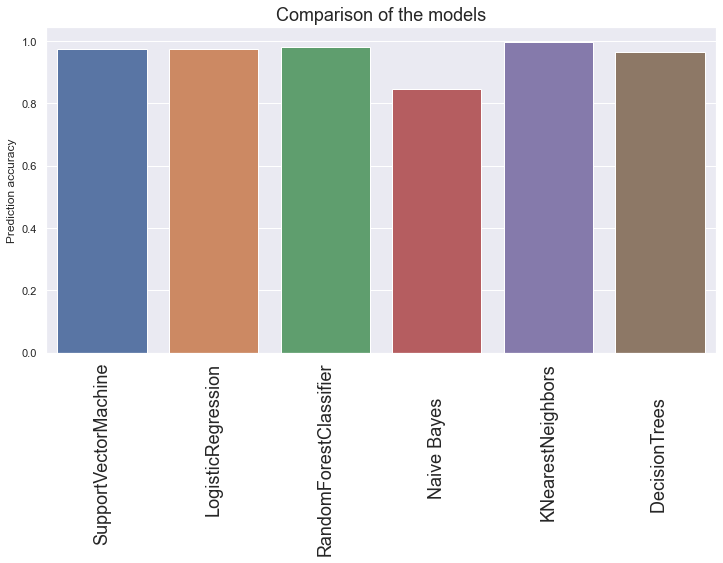

In [32]:
labels  = []
height = []
for i in range(len(results)):
    labels.append(results[i][0])
    height.append(results[i][-1])
    
plt.figure(figsize = (12,6))    
ax = sns.barplot(labels,height)
ax.set_xticklabels(labels, fontsize = 18, rotation = 90)
plt.title("Comparison of the models", fontsize = 18)
plt.ylabel("Prediction accuracy")
plt.show()

In [33]:
print("Algorithm \t\t\t Accuracy")
print("--------- \t\t\t --------")
print()
for i in results:
    print(i[0],"\t\t" ,"{0:.2f}".format(i[3]*100),"%")

Algorithm 			 Accuracy
--------- 			 --------

SupportVectorMachine 		 97.45 %
LogisticRegression 		 97.45 %
RandomForestClassifier 		 98.18 %
Naive Bayes        		 84.73 %
KNearestNeighbors 		 99.64 %
DecisionTrees        		 96.36 %
